In [ ]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [ ]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [ ]:
%run ../test/test_algorithms.py

In [ ]:
%run ../test/test_dataloader.py

In [ ]:
%run ../test/test_predictorsI.py

In [ ]:
%run ../test/test_predictorsII.py

## Running example of the system

In [ ]:
%run ../consensus/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(10)

In [ ]:
op0.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## First whole system test - I am alive

In [ ]:
%run ../consensus/algorithms.py
%run ../tools/dataloader.py
%run ../tools/predictorsI.py
%run ../tools/predictorsII.py
%run ../tools/predictorsIII.py

In [1]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [2]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [3]:
training = training.get_close()

In [4]:
predict = DataLoader('aapl', '2010-06-01', '2010-09-01')

In [5]:
predict = predict.get_close()

In [6]:
predict_req, real = data_prep(predict, 24, 30)

Epoch 1/10
23/23 [==============================] - 0s 21ms/step - loss: 29.4289 - mean_squared_error: 29.4289 - val_loss: 36.9376 - val_mean_squared_error: 36.9376
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 15.0108 - mean_squared_error: 15.0108 - val_loss: 15.4061 - val_mean_squared_error: 15.4061
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 5.3267 - mean_squared_error: 5.3267 - val_loss: 4.9750 - val_mean_squared_error: 4.9750
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 1.6210 - mean_squared_error: 1.6210 - val_loss: 1.4779 - val_mean_squared_error: 1.4779
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.3895 - mean_squared_error: 0.3895 - val_loss: 0.5037 - val_mean_squared_error: 0.5037
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.1344 - mean_squared_error: 0.1344 - val_loss: 0.3787 - val_mean_squared_error: 0.3787
Epoch 7/10
23/23 [=============

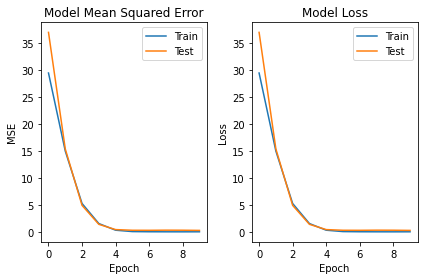

Epoch 1/10
23/23 [==============================] - 1s 38ms/step - loss: 18.6511 - mean_squared_error: 18.6511 - val_loss: 10.4992 - val_mean_squared_error: 10.4992
Epoch 2/10
23/23 [==============================] - 0s 17ms/step - loss: 2.5908 - mean_squared_error: 2.5908 - val_loss: 2.5473 - val_mean_squared_error: 2.5473
Epoch 3/10
23/23 [==============================] - 0s 16ms/step - loss: 0.3457 - mean_squared_error: 0.3457 - val_loss: 0.6701 - val_mean_squared_error: 0.6701
Epoch 4/10
23/23 [==============================] - 0s 16ms/step - loss: 0.1508 - mean_squared_error: 0.1508 - val_loss: 0.4924 - val_mean_squared_error: 0.4924
Epoch 5/10
23/23 [==============================] - 0s 16ms/step - loss: 0.1223 - mean_squared_error: 0.1223 - val_loss: 0.5298 - val_mean_squared_error: 0.5298
Epoch 6/10
23/23 [==============================] - 0s 16ms/step - loss: 0.1271 - mean_squared_error: 0.1271 - val_loss: 0.5507 - val_mean_squared_error: 0.5507
Epoch 7/10
23/23 [============

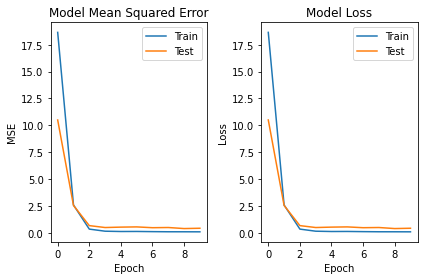

Epoch 1/10
23/23 [==============================] - 0s 9ms/step - loss: 19.8141 - mean_squared_error: 19.8141 - val_loss: 11.3873 - val_mean_squared_error: 11.3873
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 2.5668 - mean_squared_error: 2.5668 - val_loss: 0.8560 - val_mean_squared_error: 0.8560
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2071 - mean_squared_error: 0.2071 - val_loss: 0.4092 - val_mean_squared_error: 0.4092
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1397 - mean_squared_error: 0.1397 - val_loss: 0.3638 - val_mean_squared_error: 0.3638
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1200 - mean_squared_error: 0.1200 - val_loss: 0.3552 - val_mean_squared_error: 0.3552
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1278 - mean_squared_error: 0.1278 - val_loss: 0.3731 - val_mean_squared_error: 0.3731
Epoch 7/10
23/23 [==================

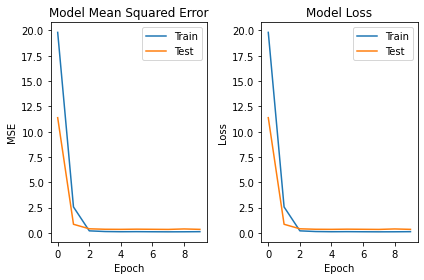

In [7]:
final_df = individual_predictors(training, predict_req, 30)

In [8]:
predict_req

,Close
Date,
2010-06-01,9.315357
2010-06-02,9.426786
2010-06-03,9.397143
2010-06-04,9.141429
2010-06-07,8.962143
2010-06-08,8.904643
2010-06-09,8.685714
2010-06-10,8.946786
2010-06-11,9.053929


In [9]:
real

,Close
Date,
2010-07-06,8.879643
2010-07-07,9.238214
2010-07-08,9.217500
2010-07-09,9.272143
2010-07-12,9.188929
2010-07-13,8.992857
2010-07-14,9.026071
2010-07-15,8.980357
2010-07-16,8.925000


In [10]:
#final_df = pd.concat([A, B, C], axis=1)

In [11]:
final_df

,CNN-LSTM,Bidirectional LSTM,CNN
0,9.324005,6.704463,9.519224
1,8.896785,7.040166,9.454217
2,9.254481,7.731608,9.135795
3,8.889673,9.067739,9.419955
4,9.473899,10.079119,9.592921
5,9.117912,7.135644,9.535845
6,9.039382,7.034651,9.379126
7,9.410502,6.446594,9.657327
8,9.419703,10.167922,9.569432
9,9.542691,8.464903,9.412169


### System Disagreement

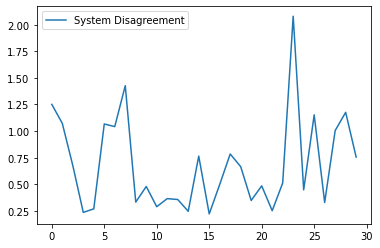

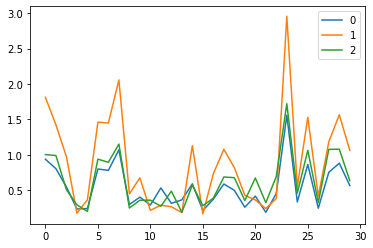

In [12]:
system_disagreement(final_df)

In [13]:
disagreement(final_df)

,System Disagreement
0,1.251005
1,1.072911
2,0.676833
3,0.235681
4,0.268987
5,1.066756
6,1.041989
7,1.426992
8,0.332542
9,0.479017


In [14]:
predictor_score(final_df)

,0,1,2
0,0.938254,1.811434,1.003327
1,0.804684,1.423556,0.990494
2,0.547187,0.975687,0.507624
3,0.236116,0.176761,0.294166
4,0.241414,0.363806,0.201740
5,0.800067,1.460823,0.939378
6,0.781492,1.449735,0.894739
7,1.070244,2.058214,1.152519
8,0.299316,0.448903,0.249406
9,0.402770,0.675018,0.359263


### System consensus

In [15]:
algos = consensus(final_df, real)

In [16]:
algos

,Average,NoMemory,Memory,Focus,Anchor
0,8.515898,8.515898,8.515898,8.515898,8.635752
1,8.463723,8.812061,8.637892,8.896785,8.634755
2,8.707295,9.045752,8.902195,9.135795,8.864536
3,9.125789,9.147899,9.139531,8.889673,9.244915
4,9.715313,9.739855,9.644054,9.592921,9.769253
5,8.596467,8.841001,8.886012,9.117912,8.542838
6,8.484386,8.907557,8.790596,9.039382,8.627875
7,8.504808,9.285160,8.982475,9.410502,8.730339
8,9.719019,9.594407,9.611959,9.419703,9.807483
9,9.139921,9.237378,9.294140,9.542691,8.982466


In [17]:
evaluation = evaluation_frame(algos, real)

In [18]:
evaluation

,Average,NoMemory,Memory,Focus,Anchor,Real Value
Date,,,,,,
2010-07-06,8.515898,8.515898,8.515898,8.515898,8.635752,8.879643
2010-07-07,8.463723,8.812061,8.637892,8.896785,8.634755,9.238214
2010-07-08,8.707295,9.045752,8.902195,9.135795,8.864536,9.217500
2010-07-09,9.125789,9.147899,9.139531,8.889673,9.244915,9.272143
2010-07-12,9.715313,9.739855,9.644054,9.592921,9.769253,9.188929
2010-07-13,8.596467,8.841001,8.886012,9.117912,8.542838,8.992857
2010-07-14,8.484386,8.907557,8.790596,9.039382,8.627875,9.026071
2010-07-15,8.504808,9.285160,8.982475,9.410502,8.730339,8.980357
2010-07-16,9.719019,9.594407,9.611959,9.419703,9.807483,8.925000


In [19]:
evaluation2 = evaluation_frame(final_df, real)

In [20]:
evaluation2

,CNN-LSTM,Bidirectional LSTM,CNN,Real Value
Date,,,,
2010-07-06,9.324005,6.704463,9.519224,8.879643
2010-07-07,8.896785,7.040166,9.454217,9.238214
2010-07-08,9.254481,7.731608,9.135795,9.217500
2010-07-09,8.889673,9.067739,9.419955,9.272143
2010-07-12,9.473899,10.079119,9.592921,9.188929
2010-07-13,9.117912,7.135644,9.535845,8.992857
2010-07-14,9.039382,7.034651,9.379126,9.026071
2010-07-15,9.410502,6.446594,9.657327,8.980357
2010-07-16,9.419703,10.167922,9.569432,8.925000


In [21]:
nice1 = calculate_error_predictors(evaluation2)
nice1

,CNN-LSTM,Bidirectional LSTM,CNN,Real Value,Error CNN-LSTM,Error Bidirectional LSTM,Error CNN
Date,,,,,,,
2010-07-06,9.324005,6.704463,9.519224,8.879643,0.444362,2.175180,0.639581
2010-07-07,8.896785,7.040166,9.454217,9.238214,0.341429,2.198047,0.216003
2010-07-08,9.254481,7.731608,9.135795,9.217500,0.036982,1.485892,0.081705
2010-07-09,8.889673,9.067739,9.419955,9.272143,0.382470,0.204404,0.147812
2010-07-12,9.473899,10.079119,9.592921,9.188929,0.284970,0.890190,0.403993
2010-07-13,9.117912,7.135644,9.535845,8.992857,0.125055,1.857213,0.542988
2010-07-14,9.039382,7.034651,9.379126,9.026071,0.013311,1.991420,0.353055
2010-07-15,9.410502,6.446594,9.657327,8.980357,0.430145,2.533763,0.676970
2010-07-16,9.419703,10.167922,9.569432,8.925000,0.494703,1.242922,0.644432


In [22]:
nice = calculate_error_algorithms(evaluation)

In [23]:
print_simple_statistics(nice)

-------SUM-------
9.34900299708049
9.028187312133753
8.08630436480205
14.633651892344156
8.574668100850909
------AVERAGE----
0.31163343323601633
0.30093957707112506
0.269543478826735
0.48778839641147187
0.28582227002836363
------MEDIAN-----
0.2929383913675947
0.2058137659745105
0.19933026257929498
0.37625646591186523
0.22516573426522157


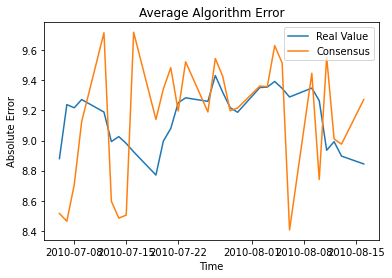

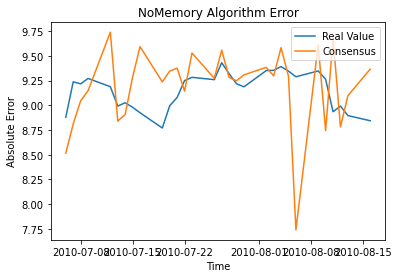

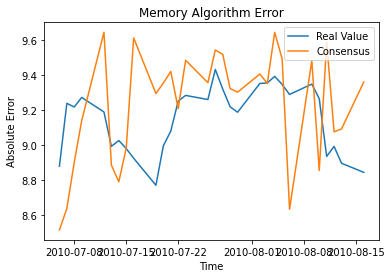

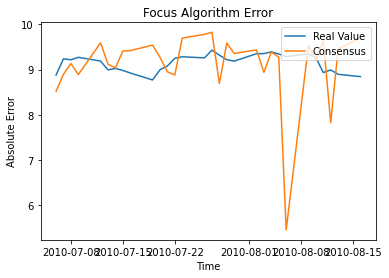

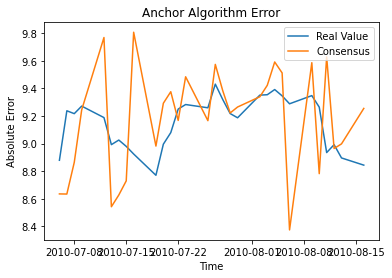

In [24]:
plot_performance(nice)